In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df = df[['v1', 'v2']]

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df = df.rename(columns = {'v1':'target', 'v2':'text'})

In [9]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
df.duplicated().sum()

403

In [15]:
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

In [19]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

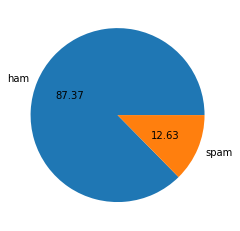

In [20]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

In [ ]:
!pip install nltk

In [21]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Saeed
[nltk_data]     computer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df['num_characters'] = df['text'].apply(len)

In [24]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [26]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [28]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

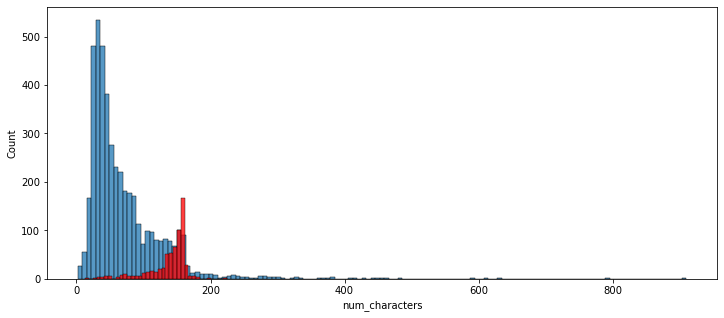

In [31]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color = 'red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

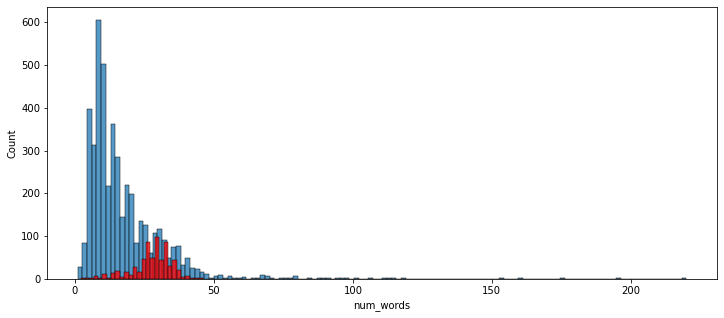

In [32]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color = 'red')

<AxesSubplot:>

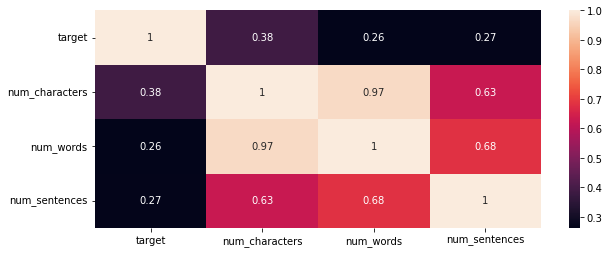

In [34]:
plt.figure(figsize=(10,4))
sns.heatmap(df.corr(), annot=True)

# Data Preprocessing Steps

. Lower Case
. Tokenization
. Removing Special Characters
. Removing Stop words and punctuation
. Stemming

In [67]:
def processing(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)


In [71]:
processing('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [54]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Saeed
[nltk_data]     computer\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [55]:
from nltk.corpus import stopwords

In [56]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [57]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [61]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [62]:
ps.stem('Caring')

'care'

In [70]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [73]:
df['transformed_text'] = df['text'].apply(processing)

In [74]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [93]:
spam_lst = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_lst.append(word)

In [95]:
len(spam_lst)

9939

In [105]:
from collections import Counter
for i in range(len(Counter(spam_lst).most_common(10))):
    print(Counter(spam_lst).most_common(10)[i][0])

call
free
2
txt
text
u
ur
mobil
stop
repli


## Model Building

In [106]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [107]:
x = cv.fit_transform(df['transformed_text']).toarray()

In [110]:
y = df['target'].values

In [111]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [112]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 1)

In [115]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [113]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB

In [114]:
brn = BernoulliNB()
gb = GaussianNB()
mnb = MultinomialNB()

In [119]:
brn.fit(x_train, y_train)
brn_pred = brn.predict(x_test)
print(f'Accuracy {accuracy_score(y_test, brn_pred)}')
print(f'Precision {precision_score(y_test, brn_pred)}')
print(confusion_matrix(y_test, brn_pred))

Accuracy 0.9535783365570599
Precision 0.9484536082474226
[[894   5]
 [ 43  92]]


In [120]:
gb.fit(x_train, y_train)
gb_pred = gb.predict(x_test)
print(f'Accuracy {accuracy_score(y_test, gb_pred)}')
print(f'Precision {precision_score(y_test, gb_pred)}')
print(confusion_matrix(y_test, gb_pred))

Accuracy 0.8617021276595744
Precision 0.4831932773109244
[[776 123]
 [ 20 115]]


In [121]:
mnb.fit(x_train, y_train)
mnb_pred = mnb.predict(x_test)
print(f'Accuracy {accuracy_score(y_test, mnb_pred)}')
print(f'Precision {precision_score(y_test, mnb_pred)}')
print(confusion_matrix(y_test, mnb_pred))

Accuracy 0.9680851063829787
Precision 0.8541666666666666
[[878  21]
 [ 12 123]]


## Using TfIdf

In [122]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [123]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [124]:
y = df['target'].values

In [125]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 1)

In [126]:
brn.fit(x_train, y_train)
brn_pred = brn.predict(x_test)
print(f'Accuracy {accuracy_score(y_test, brn_pred)}')
print(f'Precision {precision_score(y_test, brn_pred)}')
print(confusion_matrix(y_test, brn_pred))

Accuracy 0.9535783365570599
Precision 0.9484536082474226
[[894   5]
 [ 43  92]]


In [127]:
gb.fit(x_train, y_train)
gb_pred = gb.predict(x_test)
print(f'Accuracy {accuracy_score(y_test, gb_pred)}')
print(f'Precision {precision_score(y_test, gb_pred)}')
print(confusion_matrix(y_test, gb_pred))

Accuracy 0.8607350096711799
Precision 0.48068669527896996
[[778 121]
 [ 23 112]]


In [128]:
mnb.fit(x_train, y_train)
mnb_pred = mnb.predict(x_test)
print(f'Accuracy {accuracy_score(y_test, mnb_pred)}')
print(f'Precision {precision_score(y_test, mnb_pred)}')
print(confusion_matrix(y_test, mnb_pred))

Accuracy 0.9526112185686654
Precision 1.0
[[899   0]
 [ 49  86]]


## Using TfIdf with max_features

In [129]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [130]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [131]:
y = df['target'].values

In [132]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 1)

In [133]:
mnb.fit(x_train, y_train)
mnb_pred = mnb.predict(x_test)
print(f'Accuracy {accuracy_score(y_test, mnb_pred)}')
print(f'Precision {precision_score(y_test, mnb_pred)}')
print(confusion_matrix(y_test, mnb_pred))

Accuracy 0.9613152804642167
Precision 1.0
[[899   0]
 [ 40  95]]


In [134]:
import pickle

In [135]:
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))

In [136]:
pickle.dump(mnb, open('model.pkl', 'wb'))

In [137]:
df.shape

(5169, 6)

In [138]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [139]:
new_df = df[['transformed_text', 'target']]

In [140]:
new_df.shape

(5169, 2)

In [141]:
new_df.head()

,transformed_text,target
0,go jurong point crazi avail bugi n great world...,0
1,ok lar joke wif u oni,0
2,free entri 2 wkli comp win fa cup final tkt 21...,1
3,u dun say earli hor u c alreadi say,0
4,nah think goe usf live around though,0


In [142]:
new_df.to_csv('Clean_data.csv')